In [7]:
from torchvision.models.detection import maskrcnn_resnet50_fpn
import torch
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import torchvision.transforms.functional as F
from torchvision.io import read_image,read_video
from pathlib import Path
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms.functional import convert_image_dtype


In [9]:
img = read_image('rec_2022_06_17_09_08_49_Moment.jpg')
batch_int = torch.stack([img])
batch = convert_image_dtype(batch_int, dtype=torch.float)

In [10]:
model = maskrcnn_resnet50_fpn(pretrained=True, progress=False)
model = model.eval()

output = model(batch)


In [11]:
inst_classes = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

inst_class_to_idx = {cls: idx for (idx, cls) in enumerate(inst_classes)}

print("the following instances were detected:")
print([inst_classes[label] for label in output[0]['labels']])

the following instances were detected:
['cow', 'cow', 'horse', 'cow', 'cow', 'cow', 'bench', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'horse', 'cow', 'sheep', 'cow', 'boat', 'bench', 'boat', 'cow', 'cow', 'cow', 'sheep', 'horse', 'cow', 'horse', 'cow', 'boat', 'chair', 'book', 'dining table', 'chair', 'cow', 'dining table', 'cow', 'cow', 'sheep', 'elephant', 'elephant', 'handbag', 'bench', 'cow', 'cup', 'horse', 'bed', 'sheep', 'cow', 'cow', 'cow', 'horse', 'horse', 'cow', 'cow', 'horse', 'cow', 'chair', 'horse', 'cow', 'cow', 'horse', 'couch', 'cow']


In [13]:
# from torchsummary import summary

In [ ]:
model

In [16]:
# summary(model)

In [17]:
n = 0

In [18]:
img.shape

torch.Size([3, 720, 1280])

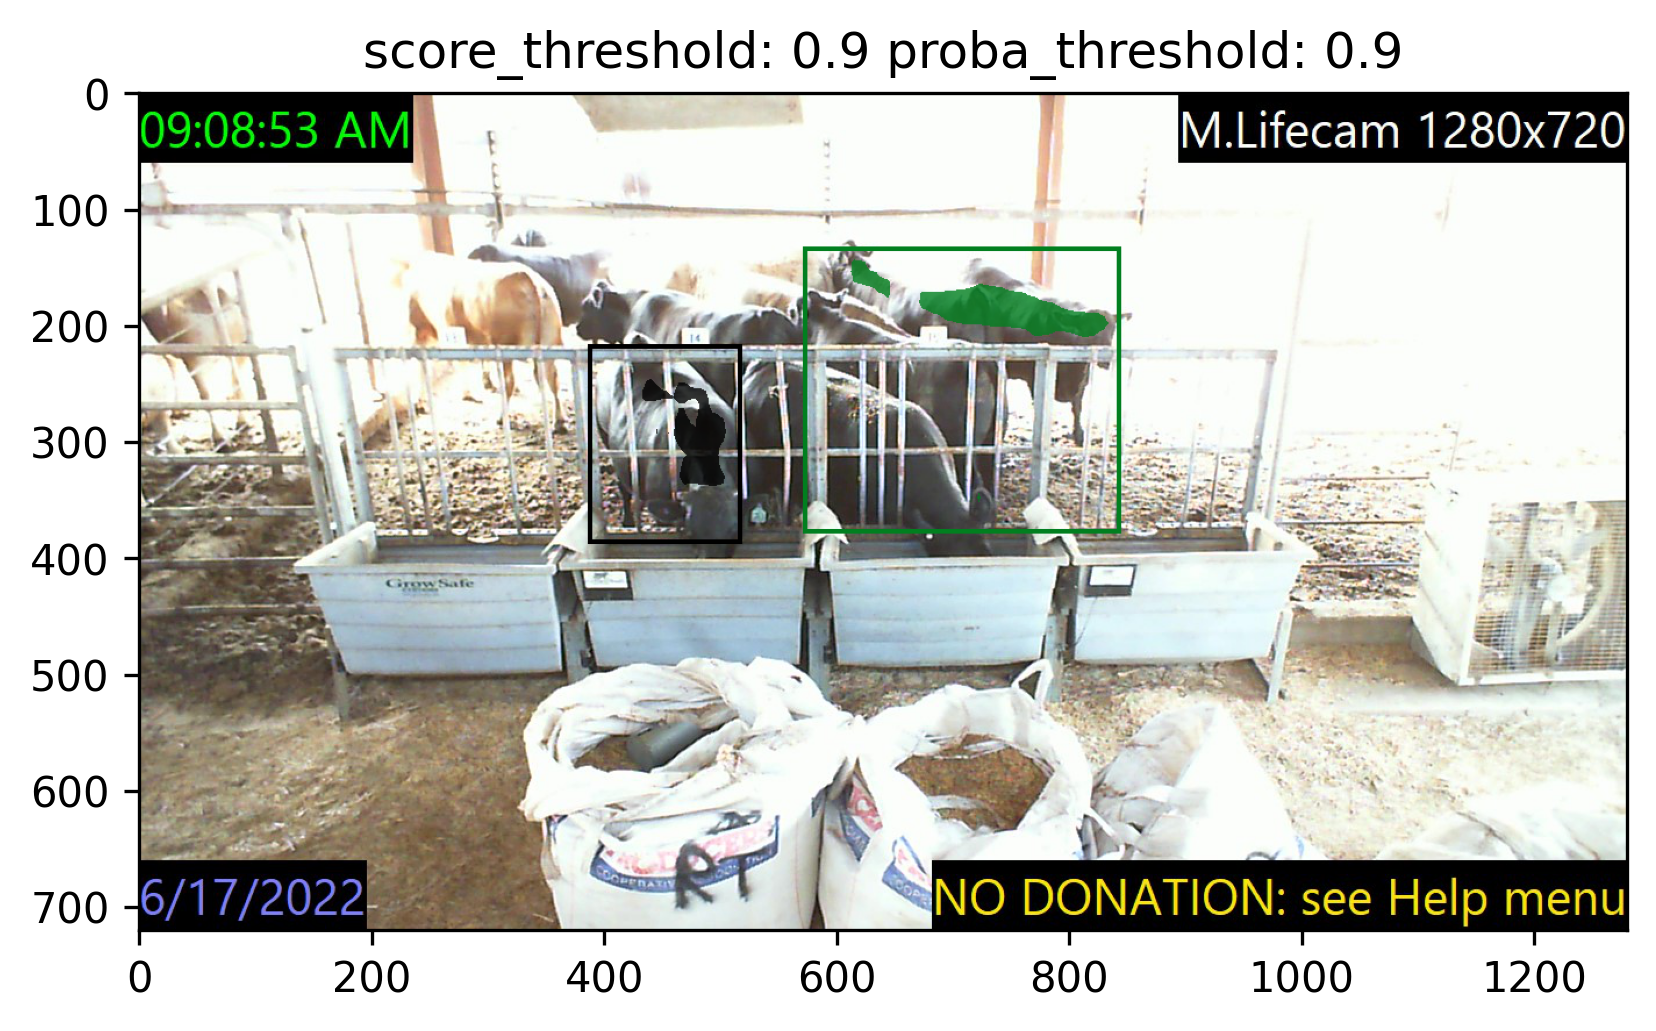

In [19]:
from torchvision.utils import draw_bounding_boxes,draw_segmentation_masks

score_threshold=0.9
proba_threshold=0.9
index = torch.logical_and(output[0]['labels'] == 21, output[0]['scores'] > score_threshold)



boxes=output[0]['boxes'][index] 
with_boxes = [draw_bounding_boxes(img, boxes, width=4)]

im=with_boxes[0]
im = im.detach()
masks = output[0]['masks'][index] > proba_threshold
with_masks = [draw_segmentation_masks(im, masks.squeeze(1))]
im = with_masks[0].detach()
im = F.to_pil_image(im)

plt.figure(dpi=300)
plt.title('score_threshold: '+str(score_threshold)+' proba_threshold: '+str(proba_threshold))

plt.imshow(np.asarray(im))
n+=1
plt.savefig(str(n)+'.png')

In [77]:
index

tensor([ True,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False])

In [81]:
output[0]['masks'][index].cpu().detach().numpy()

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]], dtype=float32)

In [30]:
import cv2
file_path='D:/NVRCH02-054549-055049.mp4'
# file_path='TAMU BCS Animal Example Video/2022 05 25 - TAMU BCS Sample Video GS - GoPro FullHD 1920x1080 30fps.MP4'
# file_path='D:/2023-02-10-SAMPLE_CUT - NVRCH01-092634-093134 - CallanGates (1).mp4'

video_capture = cv2.VideoCapture(file_path)
w = int(video_capture.get(3))
h = int(video_capture.get(4))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = int(video_capture.get(cv2.CAP_PROP_FPS))
out = cv2.VideoWriter(file_path[:-4]+'_maskrcnn_detection.avi', fourcc, fps, (w, h))


In [31]:
score_threshold=0.5
proba_threshold=0.5

In [32]:
mask_data={}
frame_number=0
while True:
    
    ret, frame = video_capture.read()  # frame shape 640*480*3
    if ret != True:
        break
    imgtest = frame[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
    imgtest = np.ascontiguousarray(imgtest)
    imgtest  = torch.from_numpy(imgtest)  
#     img = read_image(frame)
    batch_int = torch.stack([imgtest])
    batch = convert_image_dtype(batch_int, dtype=torch.float)

    output = model(batch)
    index = torch.logical_and(output[0]['labels'] == 21, output[0]['scores'] > score_threshold)
    index =  output[0]['scores'] > score_threshold


    boxes=output[0]['boxes'][index] 
    with_boxes = [draw_bounding_boxes(imgtest, boxes, width=4)]

    im=with_boxes[0]
    im = im.detach()
    masks = output[0]['masks'][index] > proba_threshold
    with_masks = [draw_segmentation_masks(im, masks.squeeze(1))]
    
    mask_data.update({frame_number:masks.squeeze(1).detach().numpy()})
    im = with_masks[0].detach()
    im = F.to_pil_image(im)

    open_cv_image = np.array(im) 
    # Convert RGB to BGR 
    open_cv_image = open_cv_image[:, :, ::-1].copy() 
    cv2.imshow("Output", open_cv_image)
    out.write(open_cv_image)
    frame_number+=1
    if cv2.waitKey(1) & 0xFF == ord('q'):

        break
out.release()
cv2.destroyAllWindows()

In [ ]:
np.save('mask_data2.npy',mask_data)

In [71]:
output[0]['masks'].shape

torch.Size([70, 1, 720, 1280])

In [72]:
masks.shape

torch.Size([2, 1, 720, 1280])

In [73]:
boxes

tensor([[386.2058, 216.8931, 518.8525, 387.1598],
        [571.1332, 132.3476, 844.5418, 378.8946]], grad_fn=<IndexBackward>)

In [74]:
output[0]['boxes'].shape

torch.Size([70, 4])

In [11]:
import cv2
cv2.destroyAllWindows()

In [33]:
md = np.load('mask_data.npy',allow_pickle=True)

In [42]:
md.item()[0]

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])

In [ ]:
output